#**Image Classification**
###Comparison of Manhattan (L1) and Euclidean (L2) Distances

---

**Import necessary Libraries:**



In [ ]:
import os
import math
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
import random
import numpy as np
from IPython import display

Set Data Directory

In [ ]:
DATA_DIR="/content/drive/MyDrive/CVPR/Dset/animals/animals/"

Load Catagories

In [ ]:
def load_image(DATA_DIR):
  catagories=os.listdir(DATA_DIR)
  return catagories

Train Data Creation Function

In [ ]:
def get_trained_data(catagories,data_dir):
  trained_data=[]
  for c in catagories:
    new_path=os.path.join(data_dir,c)
    for img in tqdm(os.listdir(new_path)):
        label=catagories.index(c)
        img_path=os.path.join(new_path,img)
        try:
          img_arr=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
          img_arr=cv2.resize(img_arr,(32,32))
        except:
          pass

        trained_data.append([img_arr,label])

  random.shuffle(trained_data)
  return trained_data

Calculate Distance

In [ ]:
def distance(train,valid):

    return abs(train-valid)

KNN classifier Function

In [ ]:
def KNN(validation_set,trained_set,k=5,L=1):
  dist=[]
  zindex=0
  for v in tqdm(validation_set):

      for t in trained_set:
        if L==1:
          z=distance(t[0],v[0])
          d= np.sum(z)

        elif L == 2:
          z=distance(t[0],v[0])
          d=np.sqrt(int(np.power(np.sum(distance(t[0],v[0])),2)))


        labell=t[1]
        dist.append([d,labell,v[1],v[0]])
      zindex +=1
  dist.sort(key=lambda x: x[0])
  return dist[:k]

K-FOLD cross validation

In [ ]:
def KFOLD(trained_set,kf=3,k_nei=3,L=1):
  point_dict={k_nei:[]}
  for i in range(kf):
    accuracy=0
    test=trained_set[i*(int(len(trained_set)/kf)):(i+1)*int(len(trained_set)/kf)]
    first=trained_set[0:i*int(len(trained_set)/kf)]
    last=trained_set[(i+1)*int(len(trained_set)/kf):]
    trained=first+last
    pred=KNN(test,trained,k_nei,L)
    print("-"*20)
    print("FOLD-",i+1)

    for p in pred:
      print(p[:3])
      if(p[2] == p[1]):
        accuracy +=1
    final_acc=accuracy/k_nei
    point_dict[k_nei].append(final_acc)
    print("Accuracy: ",final_acc*100,"%")

    print("-"*20)
  return point_dict








For showing Image from numpy image matrix

In [ ]:
def show_image(img_matrix,title):
  plt.figure()
  plt.title(title)
  plt.imshow(img_matrix)
  plt.show()


Create Catagories & Generate Train Data

In [ ]:
catag=load_image(DATA_DIR)
trained_data=get_trained_data(catag,DATA_DIR)


100%|██████████| 1000/1000 [00:17<00:00, 58.34it/s] 


In [ ]:
random.shuffle(trained_data)

For Each value of k of knn. And get point every K-Fold=5

In [ ]:

K_nei=[3, 5, 9, 13, 15, 20,25]
points=[]
for i in K_nei:

  print("-"*10,f"for Neigbour={i}","-"*10)
  point=KFOLD(trained_data,kf=5,k_nei=i,L=1)
  points.append(point)
  print("-"*7)




print(points)

---------- for Neigbour=3 ----------


100%|██████████| 600/600 [00:15<00:00, 39.13it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
Accuracy:  0.0 %
--------------------


100%|██████████| 600/600 [00:16<00:00, 37.21it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
Accuracy:  0.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.35it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
Accuracy:  66.66666666666666 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.10it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
Accuracy:  0.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 37.83it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
Accuracy:  33.33333333333333 %
--------------------
-------
---------- for Neigbour=5 ----------


100%|██████████| 600/600 [00:15<00:00, 39.05it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
[59191, 0, 0]
[60404, 0, 1]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.97it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
[46600, 1, 1]
[46672, 2, 1]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:16<00:00, 35.52it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
[58822, 0, 0]
[59814, 0, 1]
Accuracy:  60.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 37.83it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
[58374, 0, 1]
[59031, 0, 0]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 40.05it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
[57327, 2, 1]
[58125, 0, 1]
Accuracy:  20.0 %
--------------------
-------
---------- for Neigbour=9 ----------


100%|██████████| 600/600 [00:15<00:00, 38.65it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
[59191, 0, 0]
[60404, 0, 1]
[60406, 1, 1]
[61344, 1, 0]
[61381, 0, 2]
[62498, 0, 0]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.63it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
[46600, 1, 1]
[46672, 2, 1]
[49052, 0, 1]
[51775, 2, 1]
[52330, 1, 1]
[55405, 0, 0]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.81it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
[58822, 0, 0]
[59814, 0, 1]
[60001, 0, 1]
[60324, 0, 1]
[60333, 1, 1]
[60470, 0, 1]
Accuracy:  44.44444444444444 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.19it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
[58374, 0, 1]
[59031, 0, 0]
[59695, 1, 0]
[59746, 1, 0]
[59971, 1, 1]
[61041, 0, 1]
Accuracy:  22.22222222222222 %
--------------------


100%|██████████| 600/600 [00:14<00:00, 40.24it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
[57327, 2, 1]
[58125, 0, 1]
[59036, 1, 1]
[59133, 1, 1]
[59253, 2, 1]
[59933, 1, 1]
Accuracy:  44.44444444444444 %
--------------------
-------
---------- for Neigbour=13 ----------


100%|██████████| 600/600 [00:16<00:00, 36.47it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
[59191, 0, 0]
[60404, 0, 1]
[60406, 1, 1]
[61344, 1, 0]
[61381, 0, 2]
[62498, 0, 0]
[62982, 0, 1]
[63403, 1, 0]
[64344, 0, 1]
[64488, 1, 2]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.45it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
[46600, 1, 1]
[46672, 2, 1]
[49052, 0, 1]
[51775, 2, 1]
[52330, 1, 1]
[55405, 0, 0]
[57771, 0, 0]
[58249, 0, 1]
[58948, 2, 1]
[58950, 1, 1]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.92it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
[58822, 0, 0]
[59814, 0, 1]
[60001, 0, 1]
[60324, 0, 1]
[60333, 1, 1]
[60470, 0, 1]
[60976, 2, 0]
[61041, 1, 0]
[61674, 0, 1]
[61725, 1, 0]
Accuracy:  30.76923076923077 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.19it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
[58374, 0, 1]
[59031, 0, 0]
[59695, 1, 0]
[59746, 1, 0]
[59971, 1, 1]
[61041, 0, 1]
[61175, 0, 0]
[61293, 1, 0]
[61429, 0, 1]
[61533, 0, 0]
Accuracy:  30.76923076923077 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.63it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
[57327, 2, 1]
[58125, 0, 1]
[59036, 1, 1]
[59133, 1, 1]
[59253, 2, 1]
[59933, 1, 1]
[61403, 1, 1]
[61482, 0, 0]
[61925, 2, 0]
[62384, 2, 1]
Accuracy:  46.15384615384615 %
--------------------
-------
---------- for Neigbour=15 ----------


100%|██████████| 600/600 [00:15<00:00, 39.07it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
[59191, 0, 0]
[60404, 0, 1]
[60406, 1, 1]
[61344, 1, 0]
[61381, 0, 2]
[62498, 0, 0]
[62982, 0, 1]
[63403, 1, 0]
[64344, 0, 1]
[64488, 1, 2]
[64982, 0, 0]
[65247, 1, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.10it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
[46600, 1, 1]
[46672, 2, 1]
[49052, 0, 1]
[51775, 2, 1]
[52330, 1, 1]
[55405, 0, 0]
[57771, 0, 0]
[58249, 0, 1]
[58948, 2, 1]
[58950, 1, 1]
[58966, 0, 1]
[59245, 2, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.45it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
[58822, 0, 0]
[59814, 0, 1]
[60001, 0, 1]
[60324, 0, 1]
[60333, 1, 1]
[60470, 0, 1]
[60976, 2, 0]
[61041, 1, 0]
[61674, 0, 1]
[61725, 1, 0]
[61933, 1, 1]
[62049, 1, 0]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:16<00:00, 36.87it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
[58374, 0, 1]
[59031, 0, 0]
[59695, 1, 0]
[59746, 1, 0]
[59971, 1, 1]
[61041, 0, 1]
[61175, 0, 0]
[61293, 1, 0]
[61429, 0, 1]
[61533, 0, 0]
[62306, 0, 0]
[62602, 0, 0]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:16<00:00, 37.39it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
[57327, 2, 1]
[58125, 0, 1]
[59036, 1, 1]
[59133, 1, 1]
[59253, 2, 1]
[59933, 1, 1]
[61403, 1, 1]
[61482, 0, 0]
[61925, 2, 0]
[62384, 2, 1]
[62518, 0, 1]
[62565, 0, 1]
Accuracy:  40.0 %
--------------------
-------
---------- for Neigbour=20 ----------


100%|██████████| 600/600 [00:15<00:00, 39.03it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
[59191, 0, 0]
[60404, 0, 1]
[60406, 1, 1]
[61344, 1, 0]
[61381, 0, 2]
[62498, 0, 0]
[62982, 0, 1]
[63403, 1, 0]
[64344, 0, 1]
[64488, 1, 2]
[64982, 0, 0]
[65247, 1, 1]
[65819, 0, 1]
[65838, 1, 2]
[66023, 1, 1]
[66092, 0, 1]
[66660, 2, 2]
Accuracy:  35.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.92it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
[46600, 1, 1]
[46672, 2, 1]
[49052, 0, 1]
[51775, 2, 1]
[52330, 1, 1]
[55405, 0, 0]
[57771, 0, 0]
[58249, 0, 1]
[58948, 2, 1]
[58950, 1, 1]
[58966, 0, 1]
[59245, 2, 1]
[59424, 0, 0]
[59618, 0, 1]
[59672, 1, 1]
[60296, 2, 1]
[60325, 0, 1]
Accuracy:  35.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.71it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
[58822, 0, 0]
[59814, 0, 1]
[60001, 0, 1]
[60324, 0, 1]
[60333, 1, 1]
[60470, 0, 1]
[60976, 2, 0]
[61041, 1, 0]
[61674, 0, 1]
[61725, 1, 0]
[61933, 1, 1]
[62049, 1, 0]
[62124, 2, 0]
[62340, 1, 0]
[62496, 1, 1]
[62594, 1, 1]
[62763, 1, 0]
Accuracy:  35.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.58it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
[58374, 0, 1]
[59031, 0, 0]
[59695, 1, 0]
[59746, 1, 0]
[59971, 1, 1]
[61041, 0, 1]
[61175, 0, 0]
[61293, 1, 0]
[61429, 0, 1]
[61533, 0, 0]
[62306, 0, 0]
[62602, 0, 0]
[62762, 0, 0]
[63104, 0, 2]
[63139, 0, 0]
[63852, 0, 1]
[64700, 1, 0]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.92it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
[57327, 2, 1]
[58125, 0, 1]
[59036, 1, 1]
[59133, 1, 1]
[59253, 2, 1]
[59933, 1, 1]
[61403, 1, 1]
[61482, 0, 0]
[61925, 2, 0]
[62384, 2, 1]
[62518, 0, 1]
[62565, 0, 1]
[63284, 0, 0]
[63307, 0, 2]
[63677, 0, 1]
[64206, 0, 1]
[64233, 1, 0]
Accuracy:  35.0 %
--------------------
-------
---------- for Neigbour=25 ----------


100%|██████████| 600/600 [00:15<00:00, 38.39it/s]


--------------------
FOLD- 1
[57399, 0, 2]
[58490, 0, 1]
[58706, 1, 0]
[59191, 0, 0]
[60404, 0, 1]
[60406, 1, 1]
[61344, 1, 0]
[61381, 0, 2]
[62498, 0, 0]
[62982, 0, 1]
[63403, 1, 0]
[64344, 0, 1]
[64488, 1, 2]
[64982, 0, 0]
[65247, 1, 1]
[65819, 0, 1]
[65838, 1, 2]
[66023, 1, 1]
[66092, 0, 1]
[66660, 2, 2]
[66786, 1, 1]
[66930, 0, 1]
[66951, 1, 2]
[67031, 1, 2]
[67086, 1, 1]
Accuracy:  36.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 38.92it/s]


--------------------
FOLD- 2
[42569, 0, 1]
[44548, 2, 1]
[45182, 2, 1]
[46600, 1, 1]
[46672, 2, 1]
[49052, 0, 1]
[51775, 2, 1]
[52330, 1, 1]
[55405, 0, 0]
[57771, 0, 0]
[58249, 0, 1]
[58948, 2, 1]
[58950, 1, 1]
[58966, 0, 1]
[59245, 2, 1]
[59424, 0, 0]
[59618, 0, 1]
[59672, 1, 1]
[60296, 2, 1]
[60325, 0, 1]
[60345, 0, 1]
[60490, 1, 1]
[60968, 1, 1]
[61471, 2, 1]
[61674, 1, 1]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:17<00:00, 35.22it/s]


--------------------
FOLD- 3
[49989, 1, 0]
[51929, 0, 0]
[55762, 0, 0]
[58822, 0, 0]
[59814, 0, 1]
[60001, 0, 1]
[60324, 0, 1]
[60333, 1, 1]
[60470, 0, 1]
[60976, 2, 0]
[61041, 1, 0]
[61674, 0, 1]
[61725, 1, 0]
[61933, 1, 1]
[62049, 1, 0]
[62124, 2, 0]
[62340, 1, 0]
[62496, 1, 1]
[62594, 1, 1]
[62763, 1, 0]
[62812, 2, 0]
[62921, 1, 0]
[63005, 1, 0]
[63062, 1, 1]
[63426, 1, 1]
Accuracy:  36.0 %
--------------------


100%|██████████| 600/600 [00:15<00:00, 39.48it/s]


--------------------
FOLD- 4
[48476, 1, 0]
[55535, 1, 0]
[57522, 0, 1]
[58374, 0, 1]
[59031, 0, 0]
[59695, 1, 0]
[59746, 1, 0]
[59971, 1, 1]
[61041, 0, 1]
[61175, 0, 0]
[61293, 1, 0]
[61429, 0, 1]
[61533, 0, 0]
[62306, 0, 0]
[62602, 0, 0]
[62762, 0, 0]
[63104, 0, 2]
[63139, 0, 0]
[63852, 0, 1]
[64700, 1, 0]
[64886, 0, 1]
[64930, 1, 1]
[64958, 1, 0]
[65129, 0, 1]
[65404, 1, 1]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:16<00:00, 37.42it/s]


--------------------
FOLD- 5
[54202, 0, 1]
[55161, 1, 1]
[56257, 2, 1]
[57327, 2, 1]
[58125, 0, 1]
[59036, 1, 1]
[59133, 1, 1]
[59253, 2, 1]
[59933, 1, 1]
[61403, 1, 1]
[61482, 0, 0]
[61925, 2, 0]
[62384, 2, 1]
[62518, 0, 1]
[62565, 0, 1]
[63284, 0, 0]
[63307, 0, 2]
[63677, 0, 1]
[64206, 0, 1]
[64233, 1, 0]
[64619, 1, 1]
[64636, 0, 1]
[64893, 0, 0]
[65165, 0, 0]
[65234, 2, 1]
Accuracy:  40.0 %
--------------------
-------
[{3: [0.0, 0.0, 0.6666666666666666, 0.0, 0.3333333333333333]}, {5: [0.2, 0.2, 0.6, 0.2, 0.2]}, {9: [0.3333333333333333, 0.3333333333333333, 0.4444444444444444, 0.2222222222222222, 0.4444444444444444]}, {13: [0.23076923076923078, 0.38461538461538464, 0.3076923076923077, 0.3076923076923077, 0.46153846153846156]}, {15: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.4, 0.4]}, {20: [0.35, 0.35, 0.35, 0.4, 0.35]}, {25: [0.36, 0.4, 0.36, 0.4, 0.4]}]


Plotting values of points for L1 Distance



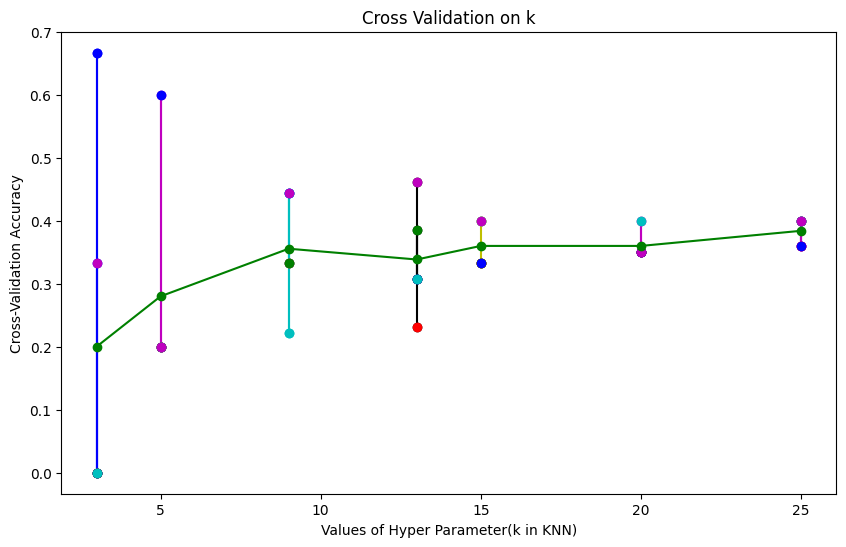

[3, 5, 9, 13, 15, 20, 25]


In [ ]:
result_dict = {}
middle_point=[]

for item in points:
    result_dict.update(item)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,6))
plt.title("Cross Validation on k")
plt.ylabel("Cross-Validation Accuracy")
plt.xlabel("Values of Hyper Parameter(k in KNN)")
for idx2,(key,values) in  enumerate(result_dict.items()):
  avg=np.sum(values)/len(values)
  middle_point.append(avg)
  x_values = [key] * len(values)
  plt.plot(x_values, values, marker='o', color=random.choice(colors), linestyle='-')

  for idx,val in enumerate(values):
      plt.plot(key,val,marker='o',color=colors[idx],linestyle='-')

plt.plot(K_nei,middle_point,marker='o',color='g',linestyle='-')
plt.show()
print(K_nei)

Plotting values of points for L2 Distance



In [ ]:
random.shuffle(trained_data)
K_nei=[3, 5, 9, 13, 15, 20,25]
points=[]
for i in K_nei:

  print("-"*10,f"for Neigbour={i}","-"*10)
  point=KFOLD(trained_data,kf=5,k_nei=i,L=2)
  points.append(point)
  print("-"*7)





---------- for Neigbour=3 ----------


100%|██████████| 600/600 [00:26<00:00, 23.06it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.72it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.98it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:28<00:00, 21.38it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
Accuracy:  66.66666666666666 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.75it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
Accuracy:  33.33333333333333 %
--------------------
-------
---------- for Neigbour=5 ----------


100%|██████████| 600/600 [00:27<00:00, 21.95it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
[60333.0, 1, 1]
[60345.0, 0, 1]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:28<00:00, 21.20it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
[55161.0, 1, 1]
[55535.0, 1, 0]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.83it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
[46672.0, 2, 1]
[49052.0, 0, 1]
Accuracy:  20.0 %
--------------------


100%|██████████| 600/600 [00:31<00:00, 19.07it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
[61429.0, 0, 1]
[63178.0, 1, 0]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.96it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
[60406.0, 1, 1]
[60968.0, 1, 1]
Accuracy:  60.0 %
--------------------
-------
---------- for Neigbour=9 ----------


100%|██████████| 600/600 [00:25<00:00, 23.63it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
[60333.0, 1, 1]
[60345.0, 0, 1]
[60490.0, 1, 1]
[61674.0, 0, 1]
[61674.0, 1, 1]
[61732.0, 1, 1]
Accuracy:  55.55555555555556 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.96it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
[55161.0, 1, 1]
[55535.0, 1, 0]
[56257.0, 2, 1]
[57327.0, 2, 1]
[57522.0, 0, 1]
[58125.0, 0, 1]
Accuracy:  22.22222222222222 %
--------------------


100%|██████████| 600/600 [00:24<00:00, 24.03it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
[46672.0, 2, 1]
[49052.0, 0, 1]
[49861.0, 0, 1]
[51775.0, 2, 1]
[52330.0, 1, 1]
[55762.0, 0, 0]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:27<00:00, 21.76it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
[61429.0, 0, 1]
[63178.0, 1, 0]
[63717.0, 1, 0]
[63852.0, 0, 1]
[64206.0, 0, 1]
[64973.0, 1, 1]
Accuracy:  33.33333333333333 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.76it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
[60406.0, 1, 1]
[60968.0, 1, 1]
[61381.0, 0, 2]
[62058.0, 1, 1]
[62088.0, 1, 1]
[62213.0, 1, 1]
Accuracy:  66.66666666666666 %
--------------------
-------
---------- for Neigbour=13 ----------


100%|██████████| 600/600 [00:25<00:00, 23.87it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
[60333.0, 1, 1]
[60345.0, 0, 1]
[60490.0, 1, 1]
[61674.0, 0, 1]
[61674.0, 1, 1]
[61732.0, 1, 1]
[61844.0, 0, 1]
[62602.0, 0, 0]
[63005.0, 1, 0]
[63144.0, 1, 1]
Accuracy:  53.84615384615385 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.79it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
[55161.0, 1, 1]
[55535.0, 1, 0]
[56257.0, 2, 1]
[57327.0, 2, 1]
[57522.0, 0, 1]
[58125.0, 0, 1]
[58706.0, 1, 0]
[58822.0, 0, 0]
[59253.0, 2, 1]
[59695.0, 1, 0]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.36it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
[46672.0, 2, 1]
[49052.0, 0, 1]
[49861.0, 0, 1]
[51775.0, 2, 1]
[52330.0, 1, 1]
[55762.0, 0, 0]
[55779.0, 2, 1]
[58173.0, 2, 1]
[58249.0, 0, 1]
[58718.0, 0, 1]
Accuracy:  23.076923076923077 %
--------------------


100%|██████████| 600/600 [00:31<00:00, 19.19it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
[61429.0, 0, 1]
[63178.0, 1, 0]
[63717.0, 1, 0]
[63852.0, 0, 1]
[64206.0, 0, 1]
[64973.0, 1, 1]
[65234.0, 2, 1]
[65404.0, 1, 1]
[65500.0, 1, 0]
[65622.0, 1, 1]
Accuracy:  38.46153846153847 %
--------------------


100%|██████████| 600/600 [00:31<00:00, 19.29it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
[60406.0, 1, 1]
[60968.0, 1, 1]
[61381.0, 0, 2]
[62058.0, 1, 1]
[62088.0, 1, 1]
[62213.0, 1, 1]
[62340.0, 1, 0]
[62762.0, 0, 0]
[62982.0, 0, 1]
[63104.0, 0, 2]
Accuracy:  53.84615384615385 %
--------------------
-------
---------- for Neigbour=15 ----------


100%|██████████| 600/600 [00:30<00:00, 19.55it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
[60333.0, 1, 1]
[60345.0, 0, 1]
[60490.0, 1, 1]
[61674.0, 0, 1]
[61674.0, 1, 1]
[61732.0, 1, 1]
[61844.0, 0, 1]
[62602.0, 0, 0]
[63005.0, 1, 0]
[63144.0, 1, 1]
[63426.0, 1, 1]
[63638.0, 0, 1]
Accuracy:  53.333333333333336 %
--------------------


100%|██████████| 600/600 [00:28<00:00, 21.03it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
[55161.0, 1, 1]
[55535.0, 1, 0]
[56257.0, 2, 1]
[57327.0, 2, 1]
[57522.0, 0, 1]
[58125.0, 0, 1]
[58706.0, 1, 0]
[58822.0, 0, 0]
[59253.0, 2, 1]
[59695.0, 1, 0]
[59746.0, 1, 0]
[59933.0, 1, 1]
Accuracy:  26.666666666666668 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.74it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
[46672.0, 2, 1]
[49052.0, 0, 1]
[49861.0, 0, 1]
[51775.0, 2, 1]
[52330.0, 1, 1]
[55762.0, 0, 0]
[55779.0, 2, 1]
[58173.0, 2, 1]
[58249.0, 0, 1]
[58718.0, 0, 1]
[58948.0, 2, 1]
[58950.0, 1, 1]
Accuracy:  26.666666666666668 %
--------------------


100%|██████████| 600/600 [00:31<00:00, 18.87it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
[61429.0, 0, 1]
[63178.0, 1, 0]
[63717.0, 1, 0]
[63852.0, 0, 1]
[64206.0, 0, 1]
[64973.0, 1, 1]
[65234.0, 2, 1]
[65404.0, 1, 1]
[65500.0, 1, 0]
[65622.0, 1, 1]
[65867.0, 0, 0]
[66045.0, 1, 1]
Accuracy:  46.666666666666664 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.81it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
[60406.0, 1, 1]
[60968.0, 1, 1]
[61381.0, 0, 2]
[62058.0, 1, 1]
[62088.0, 1, 1]
[62213.0, 1, 1]
[62340.0, 1, 0]
[62762.0, 0, 0]
[62982.0, 0, 1]
[63104.0, 0, 2]
[63295.0, 1, 2]
[63307.0, 0, 2]
Accuracy:  46.666666666666664 %
--------------------
-------
---------- for Neigbour=20 ----------


100%|██████████| 600/600 [00:26<00:00, 23.02it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
[60333.0, 1, 1]
[60345.0, 0, 1]
[60490.0, 1, 1]
[61674.0, 0, 1]
[61674.0, 1, 1]
[61732.0, 1, 1]
[61844.0, 0, 1]
[62602.0, 0, 0]
[63005.0, 1, 0]
[63144.0, 1, 1]
[63426.0, 1, 1]
[63638.0, 0, 1]
[64032.0, 0, 1]
[64101.0, 1, 0]
[64117.0, 1, 1]
[64148.0, 1, 1]
[64344.0, 0, 1]
Accuracy:  50.0 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.70it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
[55161.0, 1, 1]
[55535.0, 1, 0]
[56257.0, 2, 1]
[57327.0, 2, 1]
[57522.0, 0, 1]
[58125.0, 0, 1]
[58706.0, 1, 0]
[58822.0, 0, 0]
[59253.0, 2, 1]
[59695.0, 1, 0]
[59746.0, 1, 0]
[59933.0, 1, 1]
[59971.0, 1, 1]
[61175.0, 0, 0]
[61293.0, 1, 0]
[61344.0, 1, 0]
[61533.0, 0, 0]
Accuracy:  35.0 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.37it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
[46672.0, 2, 1]
[49052.0, 0, 1]
[49861.0, 0, 1]
[51775.0, 2, 1]
[52330.0, 1, 1]
[55762.0, 0, 0]
[55779.0, 2, 1]
[58173.0, 2, 1]
[58249.0, 0, 1]
[58718.0, 0, 1]
[58948.0, 2, 1]
[58950.0, 1, 1]
[58966.0, 0, 1]
[59036.0, 1, 1]
[59245.0, 2, 1]
[59618.0, 0, 1]
[59672.0, 1, 1]
Accuracy:  30.0 %
--------------------


100%|██████████| 600/600 [00:31<00:00, 18.86it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
[61429.0, 0, 1]
[63178.0, 1, 0]
[63717.0, 1, 0]
[63852.0, 0, 1]
[64206.0, 0, 1]
[64973.0, 1, 1]
[65234.0, 2, 1]
[65404.0, 1, 1]
[65500.0, 1, 0]
[65622.0, 1, 1]
[65867.0, 0, 0]
[66045.0, 1, 1]
[66135.0, 0, 0]
[66434.0, 1, 1]
[66677.0, 1, 1]
[66751.0, 1, 0]
[67345.0, 1, 0]
Accuracy:  50.0 %
--------------------


100%|██████████| 600/600 [00:26<00:00, 22.87it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
[60406.0, 1, 1]
[60968.0, 1, 1]
[61381.0, 0, 2]
[62058.0, 1, 1]
[62088.0, 1, 1]
[62213.0, 1, 1]
[62340.0, 1, 0]
[62762.0, 0, 0]
[62982.0, 0, 1]
[63104.0, 0, 2]
[63295.0, 1, 2]
[63307.0, 0, 2]
[63403.0, 1, 0]
[63638.0, 0, 0]
[63654.0, 2, 1]
[64488.0, 1, 2]
[64663.0, 1, 1]
Accuracy:  45.0 %
--------------------
-------
---------- for Neigbour=25 ----------


100%|██████████| 600/600 [00:27<00:00, 22.03it/s]


--------------------
FOLD- 1
[59191.0, 0, 0]
[60001.0, 0, 1]
[60324.0, 0, 1]
[60333.0, 1, 1]
[60345.0, 0, 1]
[60490.0, 1, 1]
[61674.0, 0, 1]
[61674.0, 1, 1]
[61732.0, 1, 1]
[61844.0, 0, 1]
[62602.0, 0, 0]
[63005.0, 1, 0]
[63144.0, 1, 1]
[63426.0, 1, 1]
[63638.0, 0, 1]
[64032.0, 0, 1]
[64101.0, 1, 0]
[64117.0, 1, 1]
[64148.0, 1, 1]
[64344.0, 0, 1]
[64520.0, 1, 1]
[64653.0, 2, 1]
[64700.0, 1, 0]
[64835.0, 0, 0]
[64857.0, 0, 1]
Accuracy:  48.0 %
--------------------


100%|██████████| 600/600 [00:29<00:00, 20.68it/s]


--------------------
FOLD- 2
[49989.0, 1, 0]
[51929.0, 0, 0]
[54202.0, 0, 1]
[55161.0, 1, 1]
[55535.0, 1, 0]
[56257.0, 2, 1]
[57327.0, 2, 1]
[57522.0, 0, 1]
[58125.0, 0, 1]
[58706.0, 1, 0]
[58822.0, 0, 0]
[59253.0, 2, 1]
[59695.0, 1, 0]
[59746.0, 1, 0]
[59933.0, 1, 1]
[59971.0, 1, 1]
[61175.0, 0, 0]
[61293.0, 1, 0]
[61344.0, 1, 0]
[61533.0, 0, 0]
[62239.0, 0, 0]
[62306.0, 0, 0]
[62498.0, 0, 0]
[62518.0, 0, 1]
[62812.0, 2, 0]
Accuracy:  40.0 %
--------------------


100%|██████████| 600/600 [00:25<00:00, 23.29it/s]


--------------------
FOLD- 3
[44548.0, 2, 1]
[45182.0, 2, 1]
[46600.0, 1, 1]
[46672.0, 2, 1]
[49052.0, 0, 1]
[49861.0, 0, 1]
[51775.0, 2, 1]
[52330.0, 1, 1]
[55762.0, 0, 0]
[55779.0, 2, 1]
[58173.0, 2, 1]
[58249.0, 0, 1]
[58718.0, 0, 1]
[58948.0, 2, 1]
[58950.0, 1, 1]
[58966.0, 0, 1]
[59036.0, 1, 1]
[59245.0, 2, 1]
[59618.0, 0, 1]
[59672.0, 1, 1]
[60075.0, 0, 0]
[60266.0, 1, 0]
[60296.0, 2, 1]
[60325.0, 0, 1]
[60470.0, 0, 1]
Accuracy:  28.000000000000004 %
--------------------


100%|██████████| 600/600 [00:30<00:00, 19.67it/s]


--------------------
FOLD- 4
[55405.0, 0, 0]
[57771.0, 0, 0]
[59991.0, 0, 1]
[61429.0, 0, 1]
[63178.0, 1, 0]
[63717.0, 1, 0]
[63852.0, 0, 1]
[64206.0, 0, 1]
[64973.0, 1, 1]
[65234.0, 2, 1]
[65404.0, 1, 1]
[65500.0, 1, 0]
[65622.0, 1, 1]
[65867.0, 0, 0]
[66045.0, 1, 1]
[66135.0, 0, 0]
[66434.0, 1, 1]
[66677.0, 1, 1]
[66751.0, 1, 0]
[67345.0, 1, 0]
[67460.0, 0, 1]
[67536.0, 1, 1]
[67559.0, 1, 1]
[67621.0, 0, 0]
[67829.0, 1, 0]
Accuracy:  52.0 %
--------------------


100%|██████████| 600/600 [00:29<00:00, 20.31it/s]


--------------------
FOLD- 5
[48476.0, 1, 0]
[59133.0, 1, 1]
[60404.0, 0, 1]
[60406.0, 1, 1]
[60968.0, 1, 1]
[61381.0, 0, 2]
[62058.0, 1, 1]
[62088.0, 1, 1]
[62213.0, 1, 1]
[62340.0, 1, 0]
[62762.0, 0, 0]
[62982.0, 0, 1]
[63104.0, 0, 2]
[63295.0, 1, 2]
[63307.0, 0, 2]
[63403.0, 1, 0]
[63638.0, 0, 0]
[63654.0, 2, 1]
[64488.0, 1, 2]
[64663.0, 1, 1]
[64753.0, 0, 0]
[64889.0, 0, 1]
[65182.0, 1, 1]
[65621.0, 1, 0]
[65789.0, 0, 0]
Accuracy:  48.0 %
--------------------
-------


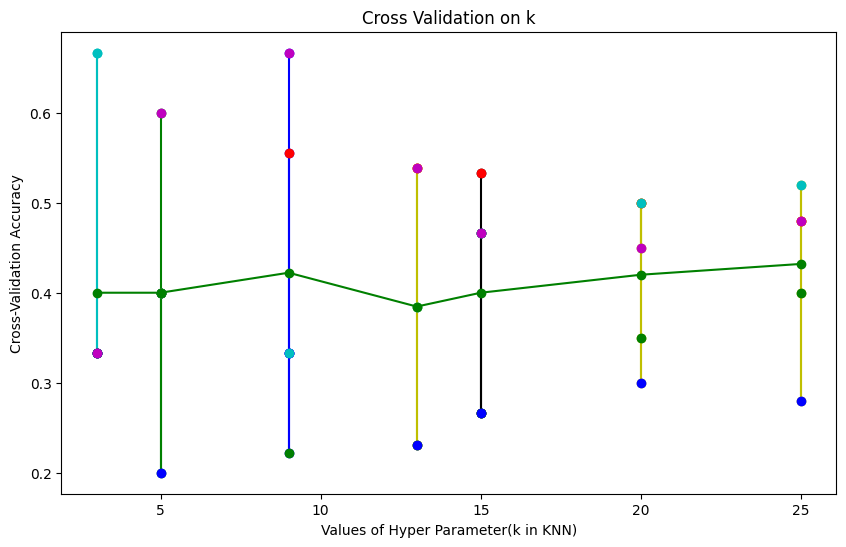

[3, 5, 9, 13, 15, 20, 25]


In [ ]:
result_dict2 = {}
middle_point2=[]

for item in points:
    result_dict2.update(item)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
plt.figure(figsize=(10,6))
plt.title("Cross Validation on k")
plt.ylabel("Cross-Validation Accuracy")
plt.xlabel("Values of Hyper Parameter(k in KNN)")
for idx2,(key,values) in  enumerate(result_dict2.items()):
  avg=np.sum(values)/len(values)
  middle_point2.append(avg)
  x_values = [key] * len(values)
  plt.plot(x_values, values, marker='o', color=random.choice(colors), linestyle='-')

  for idx,val in enumerate(values):
      plt.plot(key,val,marker='o',color=colors[idx],linestyle='-')

plt.plot(K_nei,middle_point2,marker='o',color='g',linestyle='-')
plt.show()
print(K_nei)

In [ ]:
print(middle_point2)
print("Average Accuracy for L2:",np.sum(middle_point2)/len(middle_point2))
print(middle_point2)
print("Average Accuracy for L1:",np.sum(middle_point)/len(middle_point))


[0.39999999999999997, 0.4, 0.4222222222222222, 0.3846153846153846, 0.4, 0.42000000000000004, 0.43200000000000005]
Average Accuracy for L2: 0.4084053724053724
[0.39999999999999997, 0.4, 0.4222222222222222, 0.3846153846153846, 0.4, 0.42000000000000004, 0.43200000000000005]
Average Accuracy for L1: 0.3254310134310134


In [ ]:
TEST_DIR="/content/drive/MyDrive/CVPR/Dset/test"
catag2=load_image(TEST_DIR)
test2=get_trained_data(catag2,TEST_DIR)
random.shuffle(test2)



100%|██████████| 1/1 [00:00<00:00, 26.27it/s]


In [ ]:
def top5pred(test,trained,L=1,catag=catag2):
  right=0
  pred=KNN(test,trained,L=1)
  for p in pred:
    show_image(p[3],catag[p[1]])
    if p[2] ==p[1]:
      right+=1
  accuracy=right/len(test)
  print('-'*3,f'Accuracy:{accuracy*100} %')





100%|██████████| 5/5 [00:00<00:00, 36.85it/s]


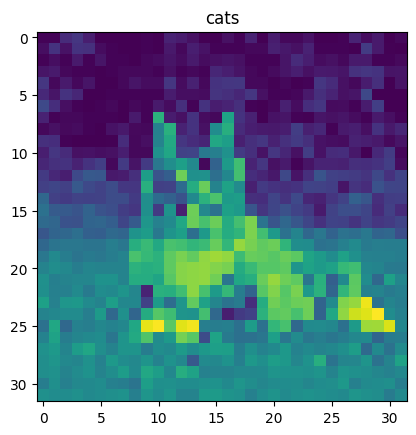

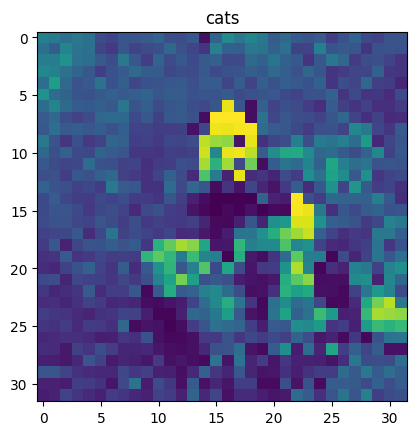

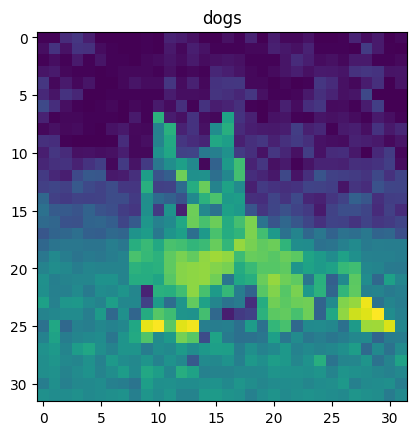

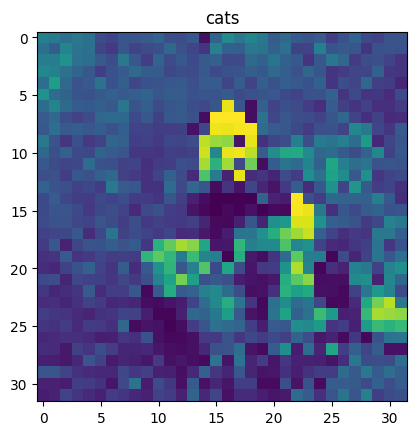

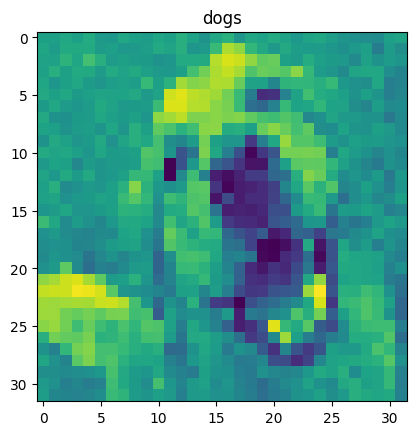

--- Accuracy:40.0 %


In [ ]:
top5pred(test2,trained_data,1)

# **Which one is Better between Manhattan (L1) and Euclidean (L2) Distances ?**
As the images are represented as vectors in a high-dimensional space, Euclidean distance is often preferred because it captures the overall similarity between the vectors.
 Manhattan distance might perform better in cases where the image features are sparse or want to reduce the impact of outliers.

 For this particular dataset,

 ** L2 distance performs better than L1 distance.**









**Limitations:**
Rotation, Scaling, and Translation: Image classification models can struggle with variations in object orientation, size, and position, leading to misclassification.
Lighting and Color Variations: Changes in lighting, shadows, and color can significantly affect the model's performance, as it may not recognize the same object under different conditions.

# **Improvements:**
**Data Augmentation:**

Apply transformations like rotation, flipping, and scaling to increase the diversity of training data, helping the model generalize better to real-world variations.

**Transfer Learning:**
Use pre-trained models on large datasets and fine-tune them on the specific target dataset to improve performance, especially with limited data.

**Regularization Techniques:**
Implement dropout, L1/L2 regularization, and early stopping to prevent overfitting and enhance the model's generalization capabilities.

**Class Imbalance Handling:**
Address class imbalance by oversampling minority classes, undersampling majority classes, or using class-weighted loss functions to improve accuracy across all classes.

**Incorporate Attention Mechanisms:**
Integrate attention mechanisms to help the model focus on the most relevant parts of the image, leading to more accurate classifications.